# Exploratory Data Analysis - Spotify

In [33]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df_track = pd.read_csv('tracks.csv')
df_track

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [54]:
df_track.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [55]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [47]:
df_track.set_index("release_date",inplace=True)
df_track.index=pd.to_datetime(df_track.index)
df_track.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [48]:
df_track_modified = df_track.copy()
df_track_modified

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
2020-10-21,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
2020-09-02,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4


In [69]:
columns_to_drop = ['id', 'explicit','danceability', 'energy', 'key',
                   'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                   'liveness', 'valence', 'tempo', 'time_signature','id_artists']
columns_to_drop

['id',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'id_artists']

In [70]:
df_track_modified = df_track_modified.drop(columns=columns_to_drop)
df_track_modified

,name,popularity,duration_ms,artists
release_date,,,,
1922-02-22,Carve,6,126903,['Uli']
1922-06-01,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa']
1922-03-21,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini']
1922-03-21,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini']
1922-01-01,Lady of the Evening,0,163080,['Dick Haymes']
...,...,...,...,...
2020-09-26,云与海,50,258267,['阿YueYue']
2020-10-21,blind,72,153293,['ROLE MODEL']
2020-09-02,What They'll Say About Us,70,187601,['FINNEAS']


### Top 10 least Popular Songs

In [71]:
least_popular_songs = df_track_modified.sort_values('popularity',ascending=True).head(10)
least_popular_songs

,name,popularity,duration_ms,artists
release_date,,,,
1935-02-20,"Newspaper Reports On Abner, 20 February 1935",0,896575,"['Norris Goff', 'Chester Lauck', 'Carlton Bric..."
1949-01-01,恋は水の上で,0,188440,['Hibari Misora']
1949-01-01,私の誕生日,0,173467,['Hibari Misora']
1949-01-01,エル・チョクロ (EL CHOCLO),0,205280,['Hibari Misora']
1949-01-01,恋は不思議なもの,0,185733,['Hibari Misora']
1949-01-01,ゆうべはどうしたの (WHATSA MALLA U),0,183427,['Hibari Misora']
1949-04-10,"Screen Director's Playhouse, Music For Million...",0,1767071,"['Wilms Herbert', 'June Allyson', 'Joseph Kear..."
1949-01-01,ブルーマンボ,0,162147,['Hibari Misora']
1949-05-19,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'..."


### Top 10 Most Popular Songs

In [72]:
most_popular_songs = df_track_modified.query('popularity>90',inplace=False).sort_values('popularity',ascending=False).head(10)
most_popular_songs

,name,popularity,duration_ms,artists
release_date,,,,
2021-03-19,Peaches (feat. Daniel Caesar & Giveon),100,198082,"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
2021-01-08,drivers license,99,242014,['Olivia Rodrigo']
2021-01-06,Astronaut In The Ocean,98,132780,['Masked Wolf']
2020-03-20,Save Your Tears,97,215627,['The Weeknd']
2020-12-04,telepatía,97,160191,['Kali Uchis']
2020-03-20,Blinding Lights,96,200040,['The Weeknd']
2021-03-05,Leave The Door Open,96,242096,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']"
2020-09-16,The Business,95,164000,['Tiësto']
2019-11-07,Streets,94,226987,['Doja Cat']


In [37]:
df_track.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


### correlation heatmap

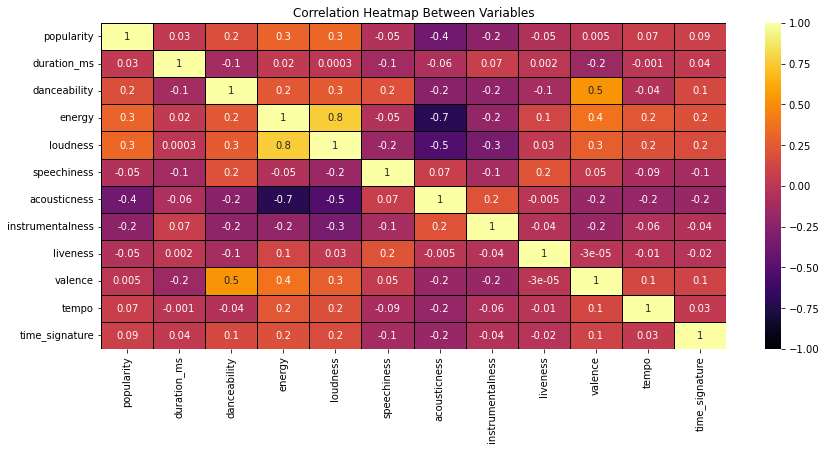

In [76]:
corr_df = df_track.drop(["key","mode","explicit"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="inferno",linewidths=1,linecolor="Black",)
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90);

In [8]:
# creating regression plot and take just 0.004 percent of the total data

sample_df = df_track.sample(int(0.004*len(df_track)))
print(len(sample_df))

2346


[Text(0.5, 1.0, 'Loudness vs Enery')]

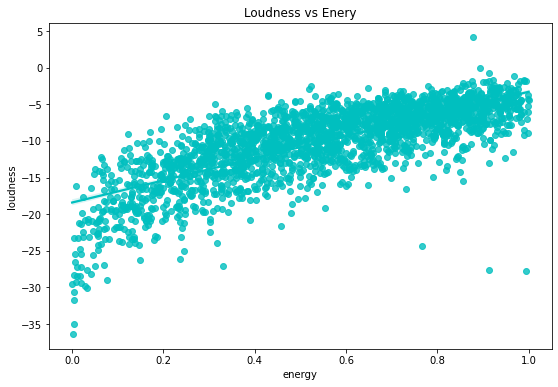

In [17]:
plt.figure(figsize=(9,6))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c").set(title="Loudness vs Enery")

Observation:
1. If the energy increases the loudness of the sound also increases 
2. If the loudness of the sound   decreases the energy is also decreases.

[Text(0.5, 1.0, 'Popularity vs Acousticness')]

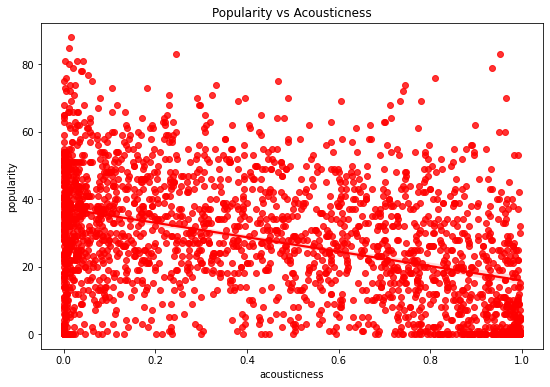

In [20]:
plt.figure(figsize=(9,6))
sns.regplot(data=sample_df,y="popularity",x="acousticness",color="r").set(title="Popularity vs Acousticness")

Observation:
1. acoustiness of the song increases the popularity decreases
2. popularity increases the acoustiness decreases

In [50]:
# Converting duration_ms with duration
df_track_modified['duration']=df_track_modified['duration_ms'].apply(lambda x : round(x/1000))
df_track_modified.drop('duration_ms', inplace=True, axis=1)

In [51]:
df_track_modified.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

In [53]:
df_track_modified['dates']=df_track_modified.index.get_level_values('release_date')
df_track_modified.dates=pd.to_datetime(df_track_modified.dates)

In [54]:
years = df_track_modified.dates.dt.year

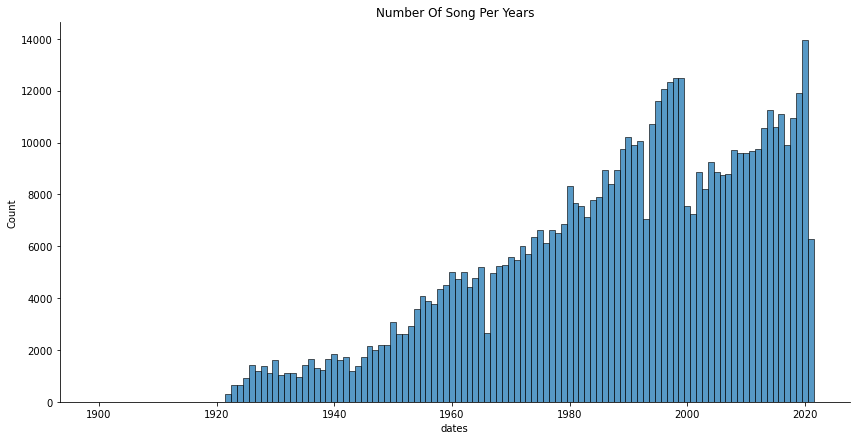

In [65]:
sns.displot(years, discrete=True , aspect=2, height=6, kind='hist').set(title='Number Of Song Per Years');

Observation:- Technology increases number of songs and their access is increases

# Features Dataset Analysis

In [68]:
df_genre = pd.read_csv("SpotifyFeatures.csv")
df_genre

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


### Duration of Songs in different Generes

Text(0, 0.5, 'Genres')

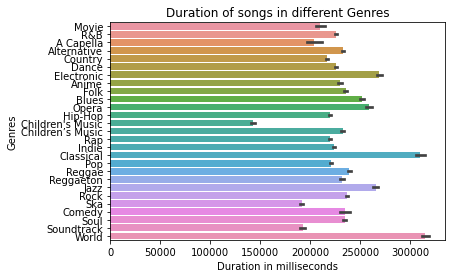

In [70]:
plt.title('Duration of songs in different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_genre)
plt.xlabel('Duration in milliseconds')
plt.ylabel('Genres')

Observation: Classical and world generes duration is more during to others generes 

### Top 5 Generes by Popularity

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

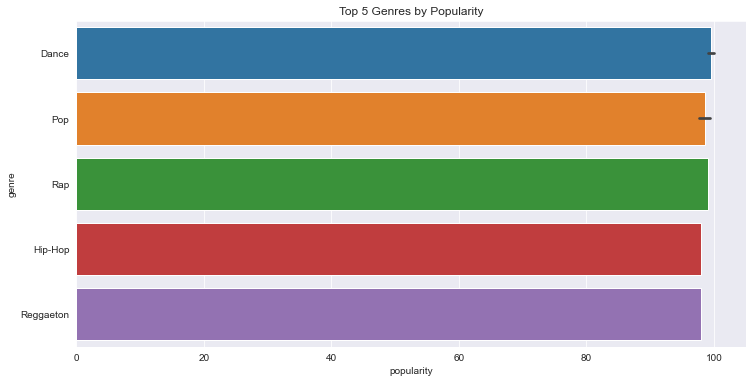

In [75]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,6))
popular = df_genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'genre', x = 'popularity', data = popular).set(title='Top 5 Genres by Popularity')

Observation:
Popular gener is:-
1. Dance
2. Pop
3. Rap
4. Hip-Hop
5. Reggaeton